In [1]:
# Step 1: Import Libraries

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Stock Data
stock_symbol = "RELIANCE.NS"
stock_data = yf.download(stock_symbol, start="2023-01-01", end="2024-01-01")

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [3]:
stock_data.head()

Price,Close,High,Low,Open,Volume
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS
Date,,,,,
2023-01-02,1176.415771,1177.831559,1163.765134,1164.587185,5316175
2023-01-03,1167.806885,1175.091302,1163.582476,1171.460509,7658932
2023-01-04,1150.223877,1169.633688,1148.145859,1167.783984,9264891
2023-01-05,1148.168701,1158.376018,1143.578870,1152.484556,13637099
2023-01-06,1158.604370,1163.650950,1150.109769,1153.923213,6349597


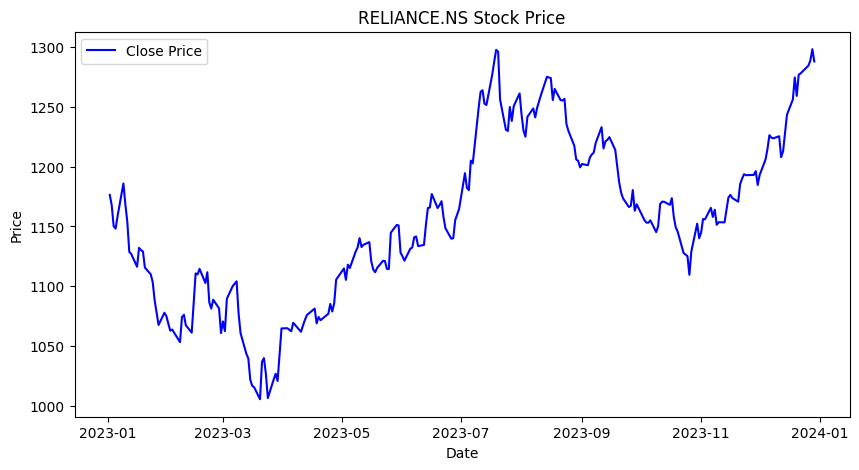

In [4]:
# Plot closing price
plt.figure(figsize=(10, 5))
plt.plot(stock_data['Close'], label='Close Price', color='blue')
plt.title(f'{stock_symbol} Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [5]:
# Data Preprocessing
# Handle missing values (if any)
stock_data = stock_data.dropna()

In [6]:
# Create additional features
stock_data['Daily Return'] = stock_data['Close'].pct_change()
stock_data['Moving Average'] = stock_data['Close'].rolling(window=10).mean()

In [7]:
# Show new features
print(stock_data[['Close', 'Daily Return', 'Moving Average']].head())

Price             Close Daily Return Moving Average
Ticker      RELIANCE.NS                            
Date                                               
2023-01-02  1176.415771          NaN            NaN
2023-01-03  1167.806885    -0.007318            NaN
2023-01-04  1150.223877    -0.015056            NaN
2023-01-05  1148.168701    -0.001787            NaN
2023-01-06  1158.604370     0.009089            NaN


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [9]:
# Prepare data
stock_data['Target'] = stock_data['Close'].shift(-1)  # Next day's price as target
stock_data = stock_data.dropna()  # Drop NaN values

In [10]:
# Features & Target
X = stock_data[['Close', 'Moving Average']]
y = stock_data['Target']

In [11]:
# Train-Test Split (70-30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
# Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [13]:
# Predict
y_pred = model.predict(X_test)

In [14]:
# Evaluate Model
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae:.2f}')

Mean Absolute Error: 9.13


In [16]:
# Calculate Errors
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate errors
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R² Score: {r2:.4f}')  # Accuracy for regression

Mean Absolute Error (MAE): 9.13
Mean Squared Error (MSE): 144.96
Root Mean Squared Error (RMSE): 12.04
R² Score: 0.9694


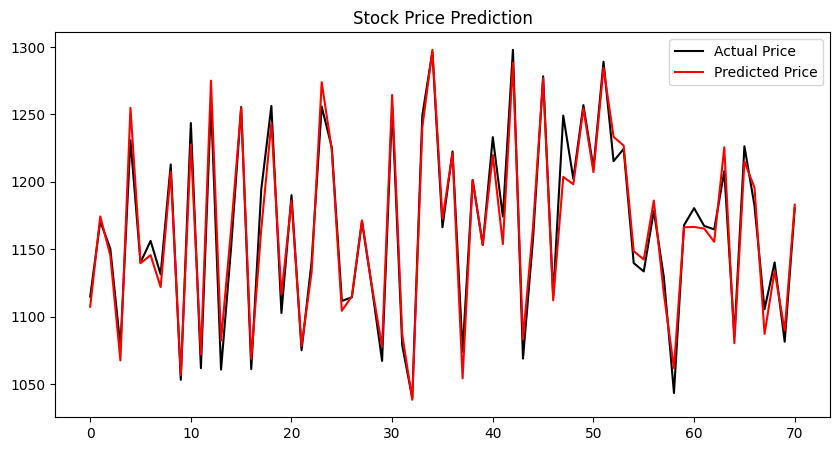

In [18]:
# Visualizing Predictions
import numpy as np

plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label="Actual Price", color='black')
plt.plot(y_pred, label="Predicted Price", color='red')
plt.legend()
plt.title("Stock Price Prediction")
plt.show()